<a href="https://colab.research.google.com/github/RoyJian/VGG16-Cifar10/blob/main/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Powered by Roy
# E-mail:B0721138@cgu.edu.tw 
# My github:https://github.com/RoyJian
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2     
from keras import regularizers
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import SGD

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)


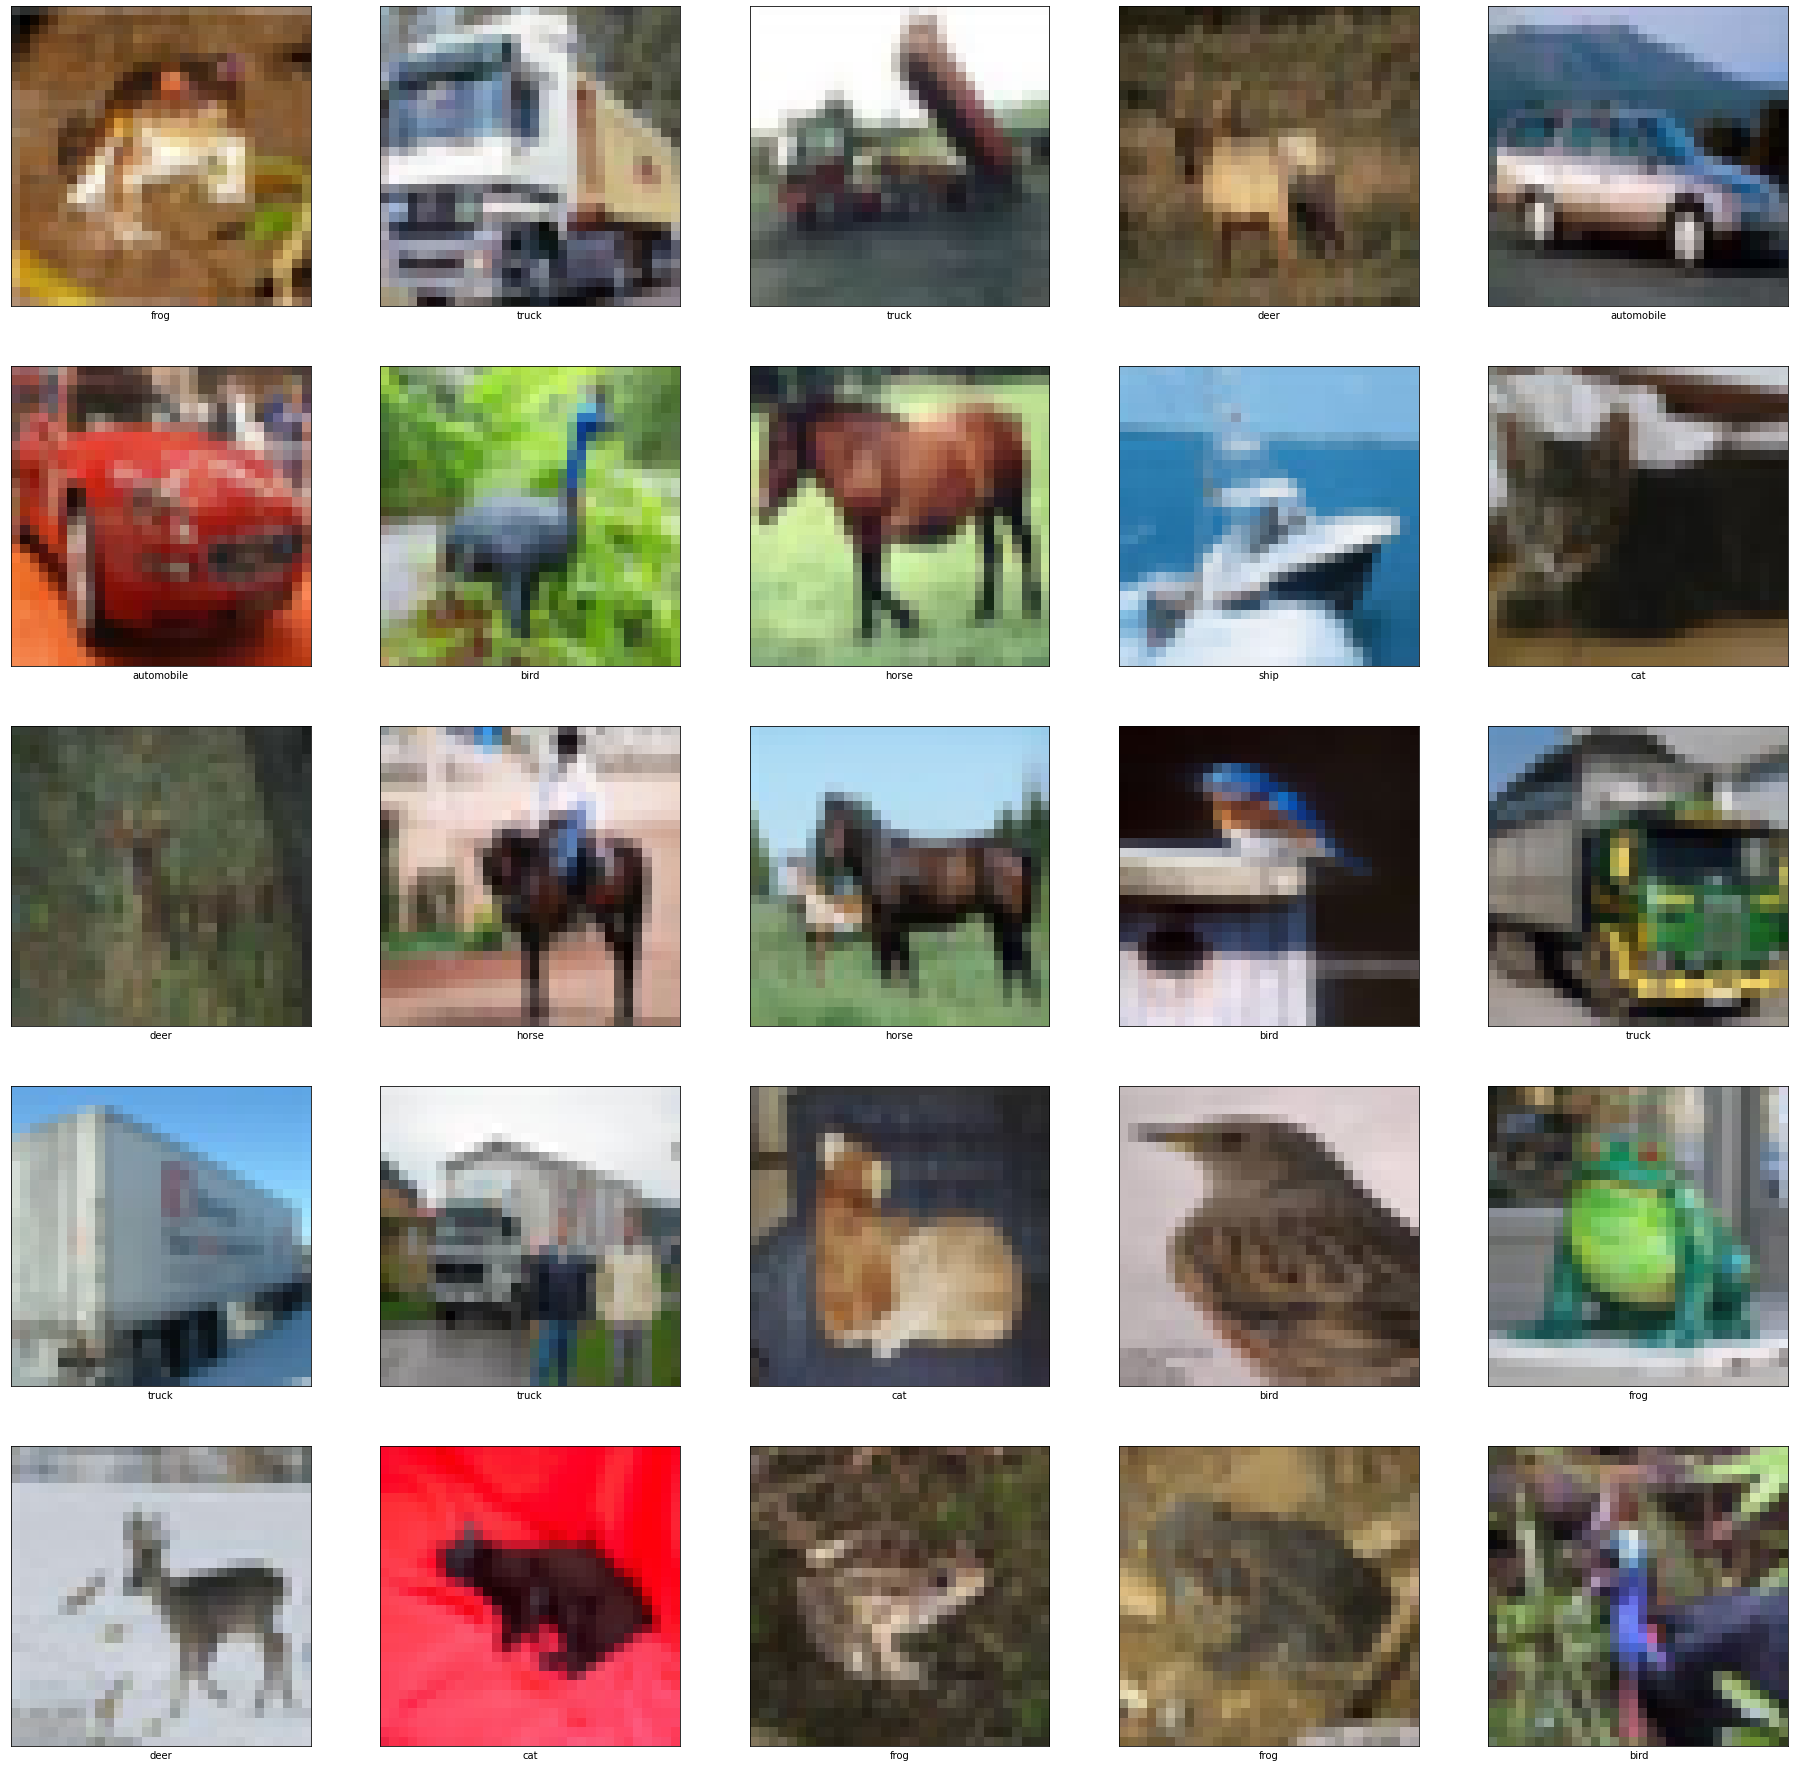

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(32,32))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
num_classes = 10
weight_decay = 0.0005
x_shape = [32,32,3]
model = models.Sequential()

model.add(Conv2D(64, (3, 3), padding='same',input_shape=x_shape,kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_78 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_44 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_42 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_30 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_45 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_43 (Batc (None, 32, 32, 64)       

In [ ]:
weight_decay = 0.0005
nb_epoch=10 
batch_size=16
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])
history=model.fit(train_images, train_labels, epochs=nb_epoch, batch_size=batch_size,
             validation_split=0.1, verbose=1, validation_data=(test_images, test_labels))

Epoch 1/10
2813/2813 [==============================] - 81s 29ms/step - loss: 9.5118 - accuracy: 0.1861 - val_loss: 7.1496 - val_accuracy: 0.2690
Epoch 2/10
2813/2813 [==============================] - 80s 29ms/step - loss: 5.9087 - accuracy: 0.2966 - val_loss: 4.9265 - val_accuracy: 0.3130
Epoch 3/10
2813/2813 [==============================] - 80s 29ms/step - loss: 4.0592 - accuracy: 0.3798 - val_loss: 3.3329 - val_accuracy: 0.4338
Epoch 4/10
2813/2813 [==============================] - 80s 28ms/step - loss: 2.9781 - accuracy: 0.4549 - val_loss: 2.5422 - val_accuracy: 0.5058
Epoch 5/10
2813/2813 [==============================] - 80s 29ms/step - loss: 2.3003 - accuracy: 0.5342 - val_loss: 1.8807 - val_accuracy: 0.6412
Epoch 6/10
2813/2813 [==============================] - 80s 29ms/step - loss: 1.9092 - accuracy: 0.6004 - val_loss: 1.7220 - val_accuracy: 0.6390
Epoch 7/10
2813/2813 [==============================] - 80s 29ms/step - loss: 1.6809 - accuracy: 0.6485 - val_loss: 1.5023 -

313/313 - 3s - loss: 1.4462 - accuracy: 0.7185


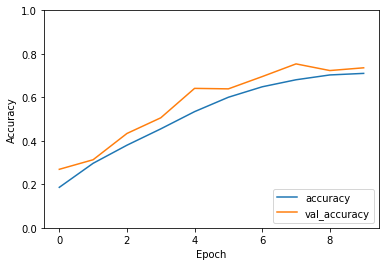

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
import time
t = time.time()
export_path_keras = "./{}.h5".format(int(t))
print(export_path_keras)
model.save(export_path_keras)

./1607236457.h5


In [ ]:
! wget https://img.huffingtonpost.com/asset/5cf8e813210000fd08e6b920.jpeg

--2020-12-06 07:28:52--  https://img.huffingtonpost.com/asset/5cf8e813210000fd08e6b920.jpeg
Resolving img.huffingtonpost.com (img.huffingtonpost.com)... 192.229.210.207, 2606:2800:21f:2317:1818:390:aaa:218f
Connecting to img.huffingtonpost.com (img.huffingtonpost.com)|192.229.210.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77573 (76K) [image/jpeg]
Saving to: ‘5cf8e813210000fd08e6b920.jpeg’

5cf8e813210000fd08e 100%[===================>]  75.75K  --.-KB/s    in 0.001s  

2020-12-06 07:28:52 (55.5 MB/s) - ‘5cf8e813210000fd08e6b920.jpeg’ saved [77573/77573]



In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image as processimage 
from keras.models import load_model
from scipy import misc
import scipy
from PIL import Image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


airplane
Percent:0.000000000000000000000000000000%
automobile
Percent:100.000000000000000000000000000000%
bird
Percent:0.000000000000000000000000000000%
cat
Percent:0.000000000000000000000000000000%
deer
Percent:0.000000000000000000000000000000%
dog
Percent:0.000000000000000000000000000000%
frog
Percent:0.000000000000000000000000000000%
horse
Percent:0.000000000000000000000000000000%
ship
Percent:0.000000000000000000000000000000%
truck
Percent:0.000000000000000000000000000000%
your picture is :--> automobile


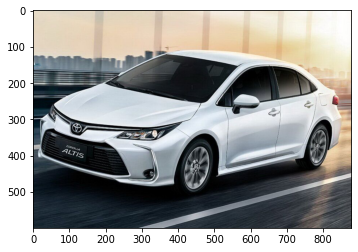

In [ ]:
filename='5cf8e813210000fd08e6b920.jpeg'
pred_img = processimage.imread(filename)#read image 
pred_img = np.array(pred_img) #transfer to array np 
pred_img= np.array(Image.fromarray(pred_img).resize((32, 32), Image.BILINEAR)).astype(np.double)
plt.imshow(pred_img, cmap=plt.cm.binary)
pred_img = pred_img.reshape(-1, 32, 32, 3)
prediction = model.predict(pred_img) #predict
labels =  ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
Final_prediction = [result.argmax() for result in prediction][0]
Final_prediction = labels[Final_prediction]
a = 0
for i in prediction[0]:
  print (labels[a])
  print ('Percent:{:.30%}'.format(i))
  a = a+1
inputimg = processimage.imread(filename)
inputimg = np.array(inputimg)
plt.imshow(inputimg)
print ('your picture is :-->',Final_prediction)